<a href="https://colab.research.google.com/github/Rbl2022/Lead_Score_Model/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [ ]:
#reading the data
df=pd.read_csv("bank marketing v2.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,yes,None
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,yes,None
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,yes,None
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,yes,None
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,yes,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  object
 14  p_recency  11162 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [ ]:
df["deposit"].value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [ ]:
df["deposit"]=df["deposit"].map({"yes":1,"no":0})

In [ ]:
df.describe()

,age,balance,day,duration,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,0.473840
std,11.913369,3225.413326,8.420740,347.128386,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,1.000000


In [ ]:
cat_cols=df.select_dtypes("object").columns

In [ ]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'p_recency'],
      dtype='object')

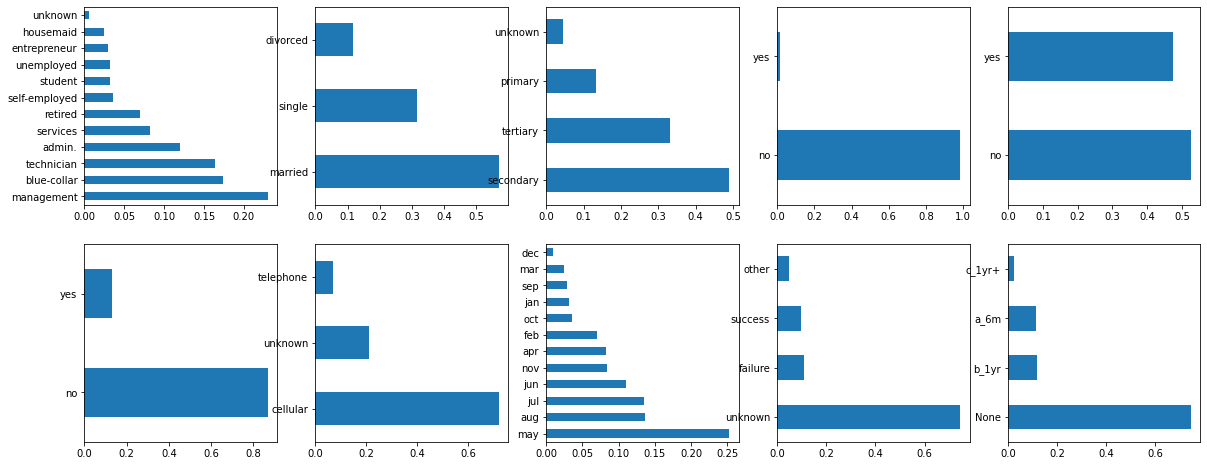

In [ ]:
#checking Categorical Columns
plt.figure(figsize=(20,8))
for i , col in enumerate(cat_cols):
  plt.subplot(2,5,i+1)
  df[col].value_counts(normalize=True).plot.barh()
plt.show()

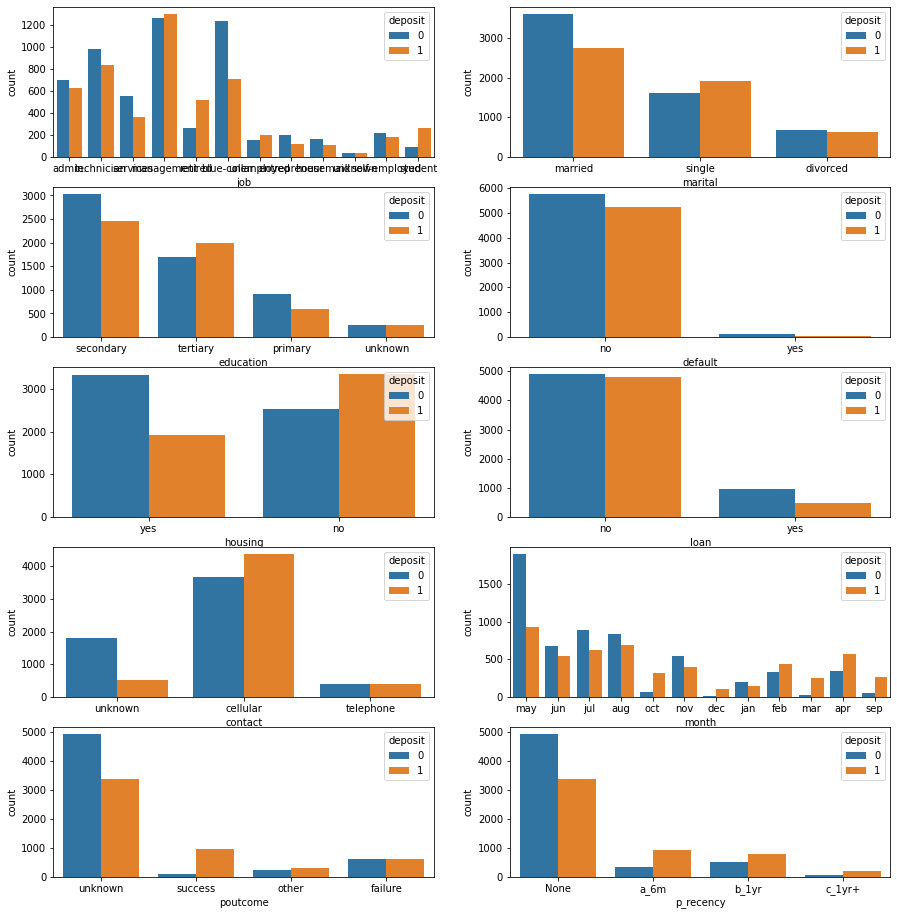

In [ ]:
#checking Categorical Columns
plt.figure(figsize=(15,16))
for i , col in enumerate(cat_cols):
  plt.subplot(5,2,i+1)
  sns.countplot(x=df[col],hue=df["deposit"])
plt.show()

In [ ]:
#Since day & duration columns won't be available hence dropping them
df1 = df.drop(['duration','day'],axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'deposit', 'p_recency'],
      dtype='object')

In [ ]:
num_cols=df1.select_dtypes(["int64","float64"]).columns

num_cols

Index(['age', 'balance', 'deposit'], dtype='object')

In [ ]:
num_cols = num_cols.drop('deposit')
num_cols

Index(['age', 'balance'], dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

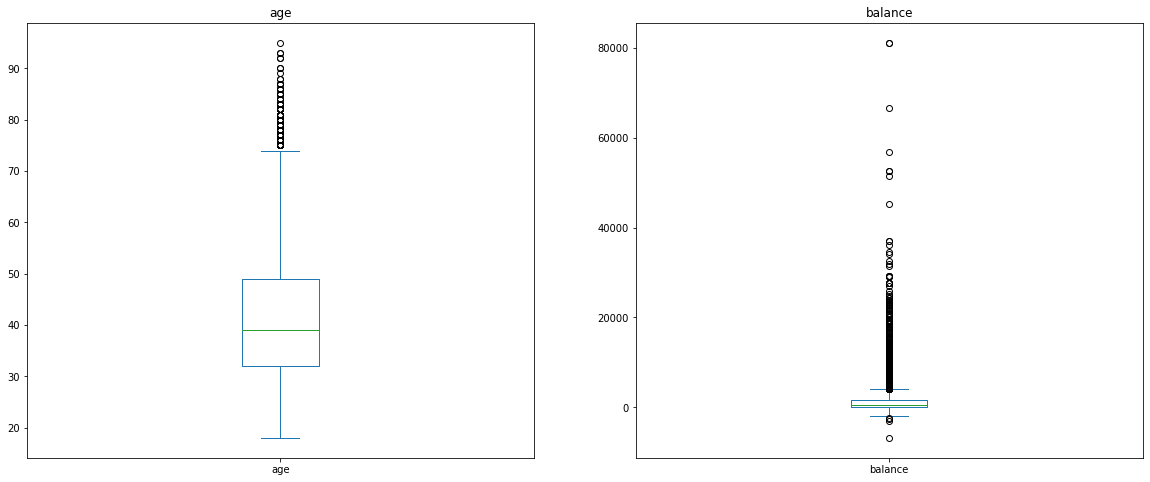

In [ ]:
#checking Numerical Columns
plt.figure(figsize=(20,8))
for i , col in enumerate(num_cols):
  plt.subplot(1,2,i+1)
  df1[col].plot.box()
  plt.title(col)
plt.show

In [ ]:
#handling default,loan, housing columns
def binary(x):
  return x.map({"yes":1,"no":0})

In [ ]:
df1[["housing","loan","default"]]=df1[["housing","loan","default"]].apply(binary)

In [ ]:
#checking columns again
for i in ["housing","loan","default"]:
  print(i)
  print(df1[i].value_counts(normalize=True))
  print("="*19)

housing
0    0.526877
1    0.473123
Name: housing, dtype: float64
loan
0    0.869199
1    0.130801
Name: loan, dtype: float64
default
0    0.984949
1    0.015051
Name: default, dtype: float64


In [ ]:
# Creating dummy columns for other variables
dum_vars=['job', 'marital', 'education', 
      'contact', 'month', 'poutcome', 'p_recency']

In [ ]:
dummy=pd.get_dummies(df1[dum_vars],drop_first=True)

In [ ]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_blue-collar      11162 non-null  uint8
 1   job_entrepreneur     11162 non-null  uint8
 2   job_housemaid        11162 non-null  uint8
 3   job_management       11162 non-null  uint8
 4   job_retired          11162 non-null  uint8
 5   job_self-employed    11162 non-null  uint8
 6   job_services         11162 non-null  uint8
 7   job_student          11162 non-null  uint8
 8   job_technician       11162 non-null  uint8
 9   job_unemployed       11162 non-null  uint8
 10  job_unknown          11162 non-null  uint8
 11  marital_married      11162 non-null  uint8
 12  marital_single       11162 non-null  uint8
 13  education_secondary  11162 non-null  uint8
 14  education_tertiary   11162 non-null  uint8
 15  education_unknown    11162 non-null  uint8
 16  contact_telephone    1

In [ ]:
#appending dummy columns to main dataframe & dropping orginal columns

df2=pd.concat([df1,dummy],axis=1)
df2.drop(dum_vars,axis=1,inplace=True)




In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   deposit              11162 non-null  int64
 6   job_blue-collar      11162 non-null  uint8
 7   job_entrepreneur     11162 non-null  uint8
 8   job_housemaid        11162 non-null  uint8
 9   job_management       11162 non-null  uint8
 10  job_retired          11162 non-null  uint8
 11  job_self-employed    11162 non-null  uint8
 12  job_services         11162 non-null  uint8
 13  job_student          11162 non-null  uint8
 14  job_technician       11162 non-null  uint8
 15  job_unemployed       11162 non-null  uint8
 16  job_unknown          1